# Problem Statement

The advertising dataset captures the sales revenue generated with respect to advertisement costs accross multple channels
like radio, tv and newspapers.
In this task we use linear regression to understand how spending on advertisement impacts sales.

Here are some questions which can reveal information from the data;

##### 1. Is there a relationship between ads and sales?
##### 2. If so how strong is that relationship?
##### 3. What types of ads contribute to sales?
##### 4. What is the effect each ad type has on sales?
##### 5. Given ad spending, can sale be predicted?


These general questions might lead to more specific questions.
Let us explore below!!!

In [1]:
# import the required libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

%matplotlib inline

In [2]:
# let import that dataset into a pandas dataframe

df = pd.read_csv("C:\\Users\\KAYODE\\Desktop\\Online Courses and Certificate\\Simplilearn\\Machine Learning\\Demo Datasets\\Lesson 4\\Advertising.csv", index_col = 0)

In [3]:
# print the first five observation

df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# print the shape of the dataset

df.shape

(200, 4)

This dataset contains 200 rows or records and 4 columns or features.

# Exploratory Data Analysis

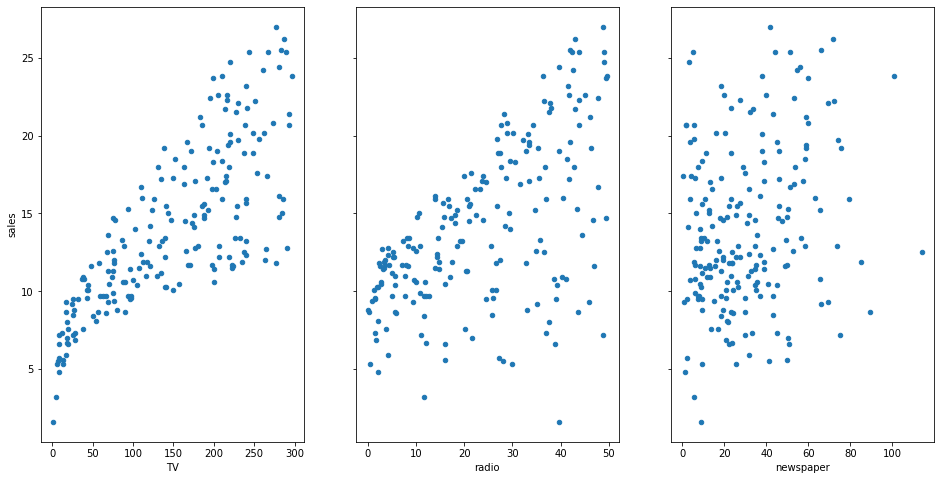

In [7]:
# let visualize the relationship between tv, radio, newspapers and sales using scatterplot
fig, ax = plt.subplots(1, 3, sharey=True)
df.plot(kind = "scatter", x= "TV", y = "sales", ax=ax[0], figsize =(16,8))
df.plot(kind = "scatter", x = "radio", y = "sales", ax=ax[1])
df.plot(kind = "scatter", x = "newspaper", y = "sales", ax=ax[2])
plt.show()

Looking at the output above we do see a relationship between ads (tv, radio, and newspaper) and sales revenue.

Therefore applying linear regression analysis to estimate the relationship between sales and tv ad spending would be approriate.

# Model Training

In [11]:
# define feature (X) and target (y) variables

X = df[["TV"]]
y = df.sales

In [12]:
# split the dataset into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [13]:
# print the shape of both the training and test set
print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is :", X_test.shape)
print("The shape of y_train is :", y_train.shape)
print("The shape of y_test is :", y_test.shape)

The shape of X_train is: (140, 1)
The shape of X_test is : (60, 1)
The shape of y_train is : (140,)
The shape of y_test is : (60,)


In [14]:
# import the linear regression module

from sklearn.linear_model import LinearRegression

# Initialize the model
lm = LinearRegression()

# Train the model

lm.fit(X_train, y_train)

LinearRegression()

In [15]:
# print the intercept and the coefficient

print(lm.intercept_)
print(lm.coef_)

6.923519536059554
[0.04812204]


By interpreting the model coefficient we can say that a unit increase in tv ad spending is associated approximately with a 0.048 unit increase in sales

In [17]:
# let makes prediction with our model
model_pred = lm.predict(X_test)

In [32]:
# comparing the result of the prediction with the actual value
actual_vs_pred = pd.DataFrame({"Actual_Value" :y_test, "Predicted_Value" :model_pred})

In [33]:
# print the result
actual_vs_pred.head()

,Actual_Value,Predicted_Value
59,23.8,17.067646
41,16.6,16.668233
35,9.5,11.528799
103,14.8,20.407316
185,17.6,19.136894


In [34]:
# Assuming that tv ad spending is $50 thousand what would be the predicted sales?
6.923519536059554 + 0.04812204 * 50

9.329621536059554

In [36]:
X_new = pd.DataFrame({"TV" : [50]})
X_new.head()

,TV
0,50


In [37]:
lm.predict(X_new)

array([9.32962162])

In [38]:
# get the lowest and highest amount of tv ad and convert it into pandas DataFrame
X_new1 = pd.DataFrame({"TV" : [df.TV.min(), df.TV.max()]})
X_new1

,TV
0,0.7
1,296.4


In [39]:
min_max_pred = lm.predict(X_new1)
min_max_pred

array([ 6.95720497, 21.18689267])

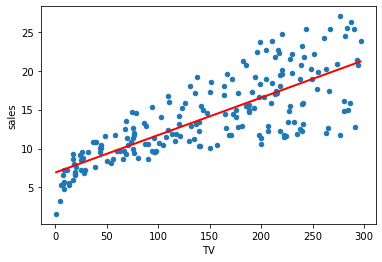

In [41]:
# plot the least_square line
df.plot(kind = "scatter", x ="TV", y = "sales")
plt.plot(X_new1, min_max_pred, c = "red", linewidth = 2)

# Let test the hypothesis:
# here we would assume the Null hypothesis to be: that there is no relationship between TV ad and sales.

# We shall reject the Null- Hypothesis if the p_val > 0.05


In [42]:
# import the parkage
import statsmodels.formula.api as smf

# applying OLS on TV / sales
lreg = smf.ols(formula = "sales~TV", data = df).fit()

In [43]:
# print the result

lreg.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [44]:
# print the p_value

lreg.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

The output shows the p_values for the model coefficient.
In this case, the p-value for TV is far less than 0.05, and so we believe that there is a relationship between TV ads and sales. With alpha set to 0.05, we can claim to have 95% confidence on the outcome. Therefore we have a strong statistical evidence to support this claim.

# How strong is the relationship?

The most common way to evaluate how strong the model fit the data is by using R_squared

In [45]:
# print the R_saquared vale

lreg.rsquared

0.611875050850071

By looking at the value of R_squared we conclude that TV ad explained about 61 percent of the total variation in sales, thus there is a high relationship between the to variables.


# Now its time to examine the relationship between the three channels of ad and sales using the multiple linear regression model

In [47]:
# define features and target variables
feature_col = df.drop("sales", axis = 1)
target = df.sales

In [51]:
# lets examine the new variables

feature_col.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [52]:
target.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [54]:
# split the data into training and test set

Xtrain, Xtest, ytrain, ytest = train_test_split(feature_col, target, test_size = 0.3, random_state =42)

In [56]:
# Train the model
ml = LinearRegression()

ml.fit(Xtrain, ytrain)

# print the coefficient and intercept
print(ml.coef_)
print(ml.intercept_)

[0.04405928 0.1992875  0.00688245]
2.70894909251591


In [57]:
# make prediction with the trained model

pred = ml.predict(Xtest)

In [59]:
# Evaluarte the model performance using the mean squared error (MSE)

print(sqrt(mean_squared_error(ytest, pred)))

1.9485372043446387


In [65]:
# print the r_squared value
r2_score(ytest, pred)

0.8609466508230368

In [62]:
# Using ols method from statsmodel

ml2 = smf.ols(formula = "sales ~ TV + radio + newspaper", data = df).fit()

In [64]:
# Print the summary result
ml2.conf_int()
ml2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 20 Aug 2022   Prob (F-statistic):           1.58e-96
Time:                        23:41:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Based on the result above we can infer that;

### 1. Firstly, the Null hypothesis is rejected for both the TV and radio ads, thus there is a significant and rele
### relevant relationship between TV, radio and sales.

#### 2. We fail to reject the null hypothesis for Newspaper ad, hence we conclude that Newspaper ad have no significant effect on sales.

### Secondly, TV and Radio ads contribute positively to sales, whereas Newspaper ad contribute negatively to sales (although this negativity has no influence on sales)

### Thirdly with R_sqaured value of 90% the model perform extremely well, thus 90% of changes in total sales is explained by TV and radio ads.

### Finally, given TV and Radio ads spending, sales is expected to increase by 0.045 and 0.188 units respectively.